In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [4]:
digikala = pd.read_csv("deta/digikala-orders.csv")
digikala["DateTime_CartFinalize"] = pd.to_datetime(digikala["DateTime_CartFinalize"])
digikala["YearMonth"] = digikala["DateTime_CartFinalize"].map(lambda date: date.year*100 + date.month)
digikala

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [5]:
orders = digikala.groupby("YearMonth")["Quantity_item"].sum().reset_index()
orders

,YearMonth,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0
...,...,...
59,201808,7944.0
60,201809,8911.0
61,201810,7311.0
62,201811,7572.0


In [6]:
x_axis = orders["YearMonth"].to_numpy(dtype=str)
y_axis = orders["Quantity_item"]

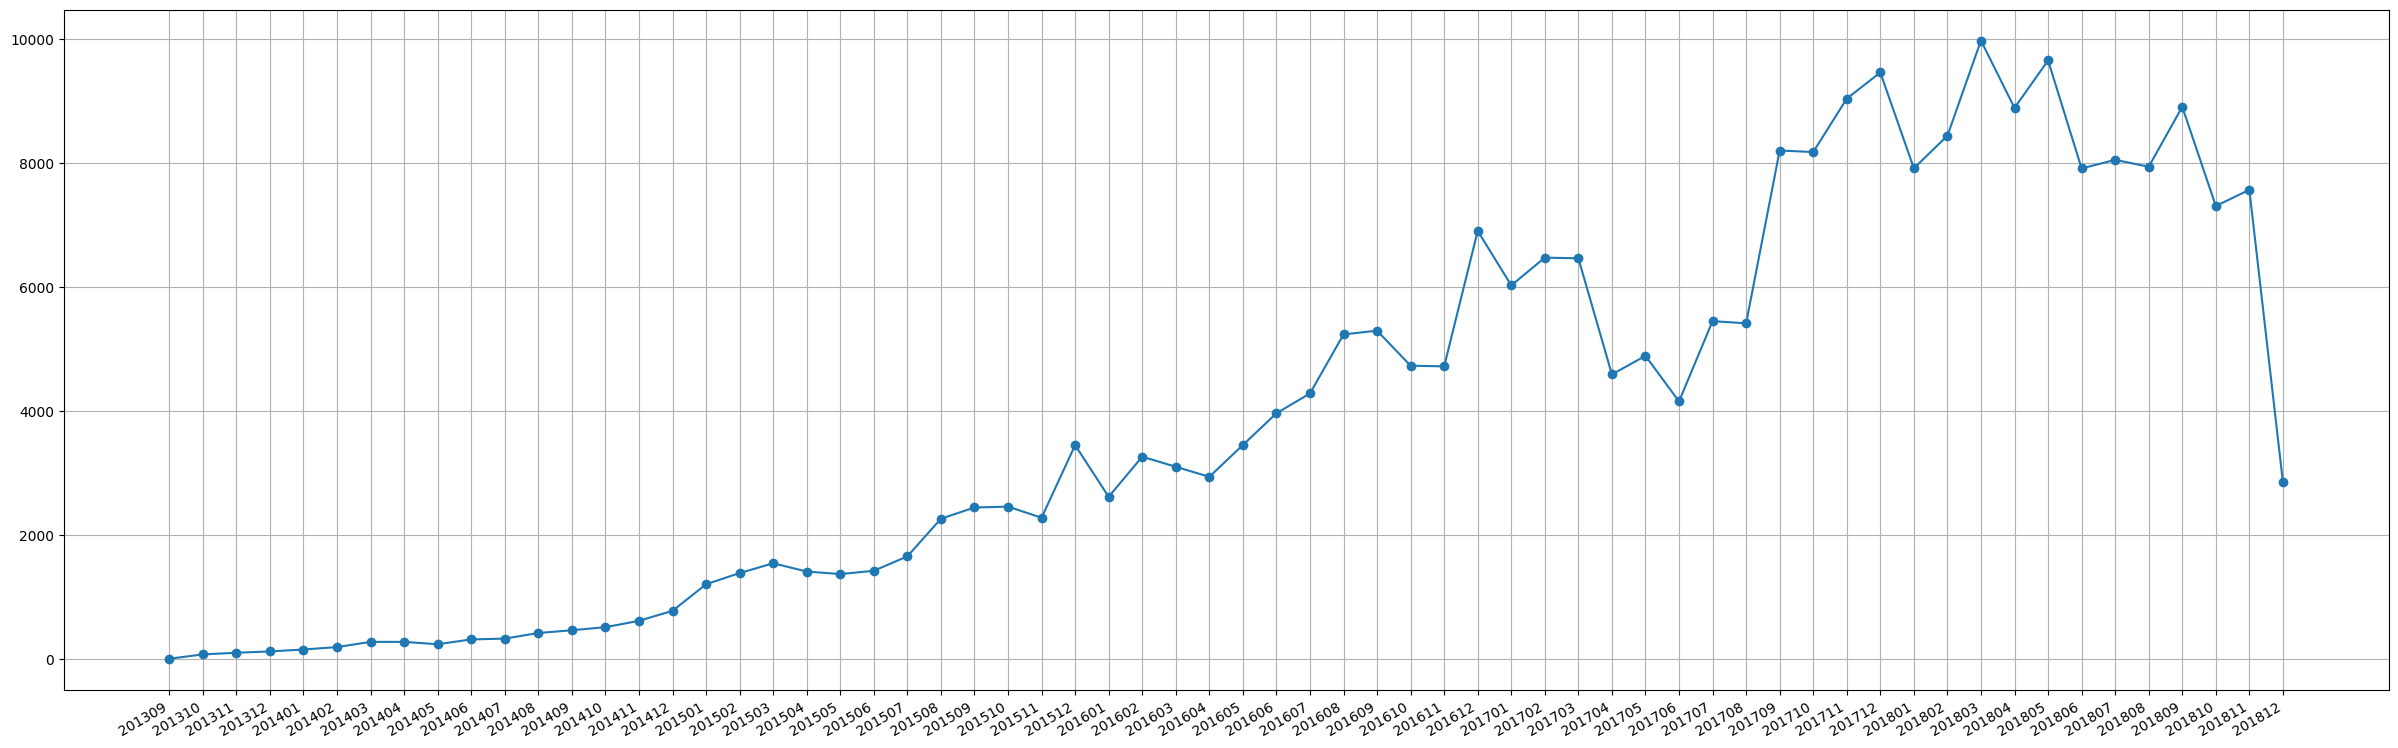

In [7]:
plt.figure(figsize=(30, 10))
plt.plot(x_axis, y_axis, marker='o')
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()

In [8]:
customers = digikala.groupby("city_name_fa")["ID_Customer"].nunique().reset_index()
customers = customers.rename(columns={"ID_Customer": "Number_of_Customers"})
customers
# customers = digikala.groupby("city_name_fa")["ID_Customer"].unique().reset_index()
# customers["Number_of_Customers"] = customers["ID_Customer"].map(lambda customers_list: len(customers_list))
# customers = customers.drop("ID_Customer", axis=1)

,city_name_fa,Number_of_Customers
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [9]:
all_customers = customers["Number_of_Customers"].sum()
customers["Customers Ratio"] = (customers["Number_of_Customers"] / all_customers) * 100
# customers["Customers Ratio"] = round(customers["Customers Ratio"], 2)
customers = customers.sort_values(["Customers Ratio"], axis=0, ascending=False).reset_index(drop=True)
customers

,city_name_fa,Number_of_Customers,Customers Ratio
0,تهران,81048,52.728207
1,کرج,4758,3.095460
2,مشهد,4674,3.040811
3,اصفهان,4664,3.034305
4,اهواز,3353,2.181395
...,...,...,...
901,فرخی,1,0.000651
902,اسیر,1,0.000651
903,پیشین,1,0.000651
904,چابهار,1,0.000651


In [10]:
other_city = pd.DataFrame({"city_name_fa" : "Others",
                           "Number_of_Customers" : customers["Number_of_Customers"][8:].sum(),
                           "Customers Ratio" : customers["Customers Ratio"][8:].sum()},
                          index=[0])

other_city

,city_name_fa,Number_of_Customers,Customers Ratio
0,Others,47647,30.998185


In [11]:
target_city = pd.concat([customers[:8], other_city]).reset_index(drop=True)
target_city

,city_name_fa,Number_of_Customers,Customers Ratio
0,تهران,81048,52.728207
1,کرج,4758,3.095460
2,مشهد,4674,3.040811
3,اصفهان,4664,3.034305
4,اهواز,3353,2.181395
5,شیراز,3076,2.001184
6,رشت,2414,1.570500
7,تبریز,2075,1.349953
8,Others,47647,30.998185


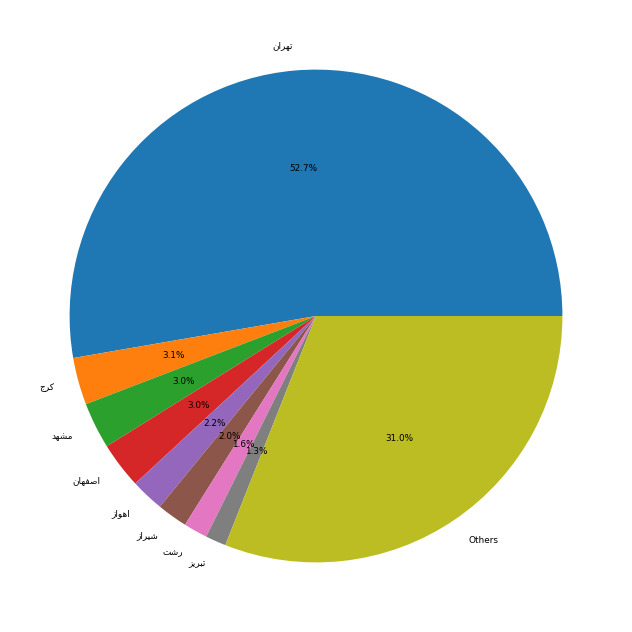

In [12]:
labels = target_city["city_name_fa"].values
persian_labels = [get_display(reshape(label)) for label in labels]

plt.figure(figsize=(10, 10), dpi=80)
plt.pie(target_city["Number_of_Customers"], labels=persian_labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.show()